# Quick start2 -Relative-densityratio with multi dimensional samples and optional parameter setting.-

### Generate data

For example,

Generate two samples that follow the 2-dimentional normal distribution of $\mathcal{N(\mu_1,\Sigma_1)}$ and $\mathcal{N(\mu_2,\Sigma_2)}$, respectively, and estimate the relative density ratio
$$r_\alpha (x) = p(x)/(\alpha p(x)+(1-\alpha)q(x)).$$

In [1]:
from src import densityratio
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import seaborn as sns

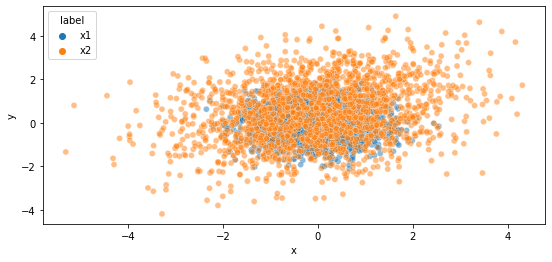

In [2]:
m = [[0.,0.],[0,0.5]]
s = [np.array([[0.5,0],
                [0,0.5]]),
      np.array([[2.0,0.5],
                [0.5,2.0]])]
np.random.seed(10)
x1 = np.random.multivariate_normal(m[0], s[0], size = 2000)
x2 = np.random.multivariate_normal(m[1], s[1], size = 2000)
df = pd.DataFrame({'x':np.r_[x1[:,0],x2[:,0]],'y':np.r_[x1[:,1],x2[:,1]],'label':['x1']*len(x1)+['x2']*len(x2)})

fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111)
sns.scatterplot(data=df, x='x', y='y', alpha=0.5,hue='label',ax=ax)
fig.savefig('pic/QS2_samples.png')

### Estimate relative-densityratio and optional parameters setting

If a value is set for *sigma, lamb*, that value is used, and if a numerical array is set, the *densityratio()* selects the optimum value by CV.   
The *alpha* is a parameter that can adjust the mixing ratio, and is set in the range of \[0,1.\].   
The *kernel_number* is the number of kernels in the linear model.

In [3]:
dens = densityratio.Densratio(x1,x2,sigma=[0.1, 0.3, 0.5, 0.7, 1., 2., 5.], lamb=[0.01, 0.02, 0.03, 0.04, 0.05],kernel_num=200,alpha=0.2)

100%|██████████| 7/7 [00:15<00:00,  2.16s/it, sigma:1.0,lambda:0.03, score:-1.1130]
Found optimal sigma = 1.0, lambda = 0.03, score=-1.113024526794863


### Compare the true with estimated.

In this case, the true density ratio $r_\alpha(x)$ is known, so we can compare $r_\alpha(x)$ with the estimated density ratio $\hat{r_\alpha}(x)$.    
The code below gives the following output:

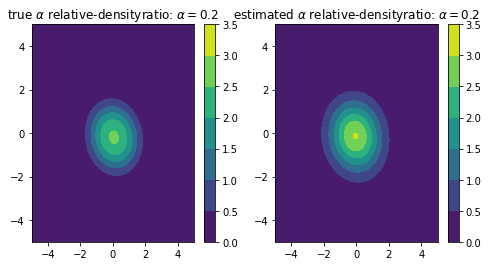

In [4]:
X,Y = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
data = np.c_[X.ravel(),Y.ravel()]
x1_pdf = lambda x: scipy.stats.multivariate_normal.pdf(x,m[0],s[0])
x2_pdf = lambda x: scipy.stats.multivariate_normal.pdf(x,m[1],s[1])
Z_true = x1_pdf(data)/(0.2*x1_pdf(data)+0.8*x2_pdf(data))

fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
levels=np.arange(0,4,0.5)
ax1.set_title(r'true $\alpha$ relative-densityratio: $\alpha=0.2$')
ax2.set_title(r'estimated $\alpha$ relative-densityratio: $\alpha=0.2$')
a = ax1.contourf(X,Y,Z_true.reshape(100,100),levels=levels)
b = ax2.contourf(X,Y,dens(np.c_[X.ravel(),Y.ravel()]).reshape(100,100),levels=levels)
fig.colorbar(a, ax=ax1)
fig.colorbar(b, ax=ax2)
fig.savefig('pic/QS2_ratio.png')

To get the parameters used for the density ratio calculation, call the following method.

In [5]:
print('lambda=',dens.lambda_)
print('sigma=',dens.sigma)
print('alpha=',dens.alpha)
print('kernel_num=',dens.N_kernels)
print('kernel_centers',dens.kernel_centers)
print('KLDiv=',dens.KLDiv)

lambda= 0.03
sigma= 1.0
alpha= 0.2
kernel_num= 200
kernel_centers [[-1.46101738  1.03531561]
 [ 0.63781183 -0.75232201]
 [ 0.98971687  0.90652182]
 [-0.18691627 -0.21438947]
 [ 0.87759897 -0.06888162]
 [-0.25847551 -0.39185314]
 [-1.15007157 -1.03151989]
 [ 0.31560315  0.25230257]
 [-0.97114012  0.54552963]
 [ 0.97533935 -0.33346775]
 [-1.02704352  0.40866849]
 [-1.07132029 -0.38093153]
 [ 0.97809289  0.24482378]
 [-0.68896938 -1.05697397]
 [ 0.67978376 -0.10808144]
 [ 0.04115829 -1.02882648]
 [ 0.58101737  0.18435993]
 [ 1.0642403  -0.33520415]
 [ 0.21635967  0.44263229]
 [ 0.27138073  0.20121984]
 [-0.22604151  0.22796593]
 [-0.07815241 -1.18583691]
 [ 0.85460659  0.18700796]
 [-0.05159542 -0.66637257]
 [-0.82481129 -0.3450975 ]
 [ 0.55469024 -0.14918812]
 [-0.37940116  0.11402819]
 [ 1.37383972  0.26991563]
 [ 0.17083164 -1.23238684]
 [ 1.42377481 -0.05840586]
 [ 0.71413794  0.00508682]
 [ 0.22581909  0.32590757]
 [ 0.45322614 -0.57974167]
 [-1.27955326 -0.17921625]
 [ 0.08411394 -0